In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# read raw data of cattle production
cattle_raw = pd.read_csv("cattle_production.csv")

In [3]:
#cattle_raw.head()

In [4]:
cattle_raw = cattle_raw.drop(['Period','Week Ending','Geo Level', 'Ag District','State ANSI',
                          'Ag District Code','County','County ANSI','Zip Code','Region',
                         'watershed_code','Watershed','Domain Category','Domain','CV (%)'],axis = 1)

In [5]:
#cattle_raw

In [6]:
cattle_dropna = cattle_raw.dropna() 

In [7]:
cattle_prod = cattle_dropna[cattle_dropna['Data Item']=='CATTLE, INCL CALVES - PRODUCTION, MEASURED IN LB']

In [8]:
#cattle_prod

In [9]:
cattle_dropstr = cattle_prod[cattle_prod['Value'].str.contains(r'\d')]

In [10]:
#cattle_dropstr

In [11]:
cattle_dropstr = cattle_dropstr.drop(['Program','Commodity','Data Item'],axis = 1)

In [12]:
cattle_dropstr.sort_values(by = ['State','Year'],inplace = True)

In [13]:
cattle_dropstr.rename(columns={'Value': 'Cattle production in lb'}, inplace=True)

In [14]:
##cattle_dropstr

In [15]:
cattle_final = cattle_dropstr

In [16]:
corn_raw = pd.read_csv("corn_silage.csv")

In [17]:
corn_raw.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2018,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, SILAGE - PRODUCTION, MEASURED IN TONS",TOTAL,NOT SPECIFIED,"80,000",NaN
1,SURVEY,2018,YEAR,NaN,STATE,ARIZONA,4.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, SILAGE - PRODUCTION, MEASURED IN TONS",TOTAL,NOT SPECIFIED,"1,479,000",NaN
2,SURVEY,2018,YEAR,NaN,STATE,ARKANSAS,5.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, SILAGE - PRODUCTION, MEASURED IN TONS",TOTAL,NOT SPECIFIED,"63,000",NaN
3,SURVEY,2018,YEAR,NaN,STATE,CALIFORNIA,6.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, SILAGE - PRODUCTION, MEASURED IN TONS",TOTAL,NOT SPECIFIED,"9,900,000",NaN
4,SURVEY,2018,YEAR,NaN,STATE,COLORADO,8.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, SILAGE - PRODUCTION, MEASURED IN TONS",TOTAL,NOT SPECIFIED,"4,180,000",NaN


In [18]:
corn_raw = corn_raw.drop(['Period','Week Ending','Geo Level', 'Ag District','State ANSI',
                          'Ag District Code','County','County ANSI','Zip Code','Region',
                         'watershed_code','Watershed','Domain Category','Domain','CV (%)'],axis = 1)

In [19]:
corn_clean = corn_raw[corn_raw['Program']=='SURVEY']

In [20]:
corn_clean.drop(['Program','Commodity','Data Item'],axis  = 1, inplace = True)

In [21]:
corn_clean.rename(columns = {'Value':"Corn production in tons"}, inplace = True)

In [22]:
corn_clean.sort_values(by = ['State','Year'],inplace = True)

In [23]:
corn_final = corn_clean

In [24]:
df = pd.merge(cattle_final, corn_final, how ='left')

In [25]:
df

,Year,State,Cattle production in lb,Corn production in tons
0,1988,ALABAMA,"671,520,000","160,000"
1,1989,ALABAMA,"680,350,000","250,000"
2,1990,ALABAMA,"641,115,000","200,000"
3,1991,ALABAMA,"659,250,000","350,000"
4,1992,ALABAMA,"525,310,000","325,000"
5,1993,ALABAMA,"508,476,000","225,000"
6,1994,ALABAMA,"504,349,000","300,000"
7,1995,ALABAMA,"544,968,000","160,000"
8,1996,ALABAMA,"535,183,000","165,000"
9,1997,ALABAMA,"556,289,000","280,000"


In [26]:
soyb_raw = pd.read_csv("soybean_production.csv")

In [27]:
#soyb_raw.head()

In [28]:
soyb_clean = soyb_raw.drop(['Period','Week Ending','Geo Level', 'Ag District','State ANSI',
                          'Ag District Code','County','County ANSI','Zip Code','Region',
                         'watershed_code','Watershed','Domain Category','CV (%)','Domain','Program'],axis = 1)

In [29]:
soyb_clean['Value'] = soyb_clean['Value'].str.replace(',', '')

In [30]:
soyb_clean['Value'] = pd.to_numeric(soyb_clean['Value'])

In [31]:
soyb_clean = soyb_clean.astype({"Value": int})

In [32]:
#soyb_clean

In [33]:
soyb_clean.rename(columns = {'Value': 'Soybeans production in bu'}, inplace = True) ## bu stands for bushels

In [34]:
soyb_clean.drop(['Commodity','Data Item'], axis = 1, inplace = True)

In [35]:
soyb_f = soyb_clean.sort_values(by = ['State','Year'])

In [36]:
soyb_f = soyb_f.groupby(['State','Year'],as_index=False)['Soybeans production in bu'].mean()

In [37]:
soyb_final = soyb_f[(soyb_f['Year']>=1988) & (soyb_f['Year'] < 2018)]

In [38]:
##soyb_final

In [39]:
df_ccs = pd.merge(df,soyb_final,how = 'left')

In [40]:
#df_ccs.dropna(inplace = True)

In [41]:
df_ccs

,Year,State,Cattle production in lb,Corn production in tons,Soybeans production in bu
0,1988,ALABAMA,"671,520,000","160,000",14250000.0
1,1989,ALABAMA,"680,350,000","250,000",11970000.0
2,1990,ALABAMA,"641,115,000","200,000",7480000.0
3,1991,ALABAMA,"659,250,000","350,000",8050000.0
4,1992,ALABAMA,"525,310,000","325,000",7830000.0
5,1993,ALABAMA,"508,476,000","225,000",7080000.0
6,1994,ALABAMA,"504,349,000","300,000",9145000.0
7,1995,ALABAMA,"544,968,000","160,000",5400000.0
8,1996,ALABAMA,"535,183,000","165,000",10370000.0
9,1997,ALABAMA,"556,289,000","280,000",8500000.0


In [42]:
#df_ccs.to_csv("result.csv", sep=',')

In [43]:
weather_raw = pd.read_csv('processed_weather.csv')

In [44]:
weather_raw.head()

,DATE,STATE,TMAX,TMIN,TAVG,EMXT,EMNT,DX90,DT32,PRCP,SNOW,AWND
0,1984,AK,4.913140,-3.994000,0.650617,24.466279,-31.725882,0.000000,198.941176,1031.366337,2016.010989,4.355556
1,1984,AL,24.076875,10.370962,17.180000,36.431250,-11.311538,62.312500,54.653846,1287.762832,10.140351,3.300000
2,1984,AR,22.219589,9.362464,15.803077,38.121918,-17.343478,61.383562,70.144928,1563.179675,106.563636,3.100000
3,1984,AZ,24.864100,8.381121,17.144382,40.318000,-7.667290,98.030000,77.308411,462.301935,157.545455,3.075000
4,1984,CA,22.195479,8.021272,15.171373,39.343836,-4.967105,62.958904,50.684211,511.087728,300.658537,3.538462


In [45]:
states = pd.read_csv('States.csv')

In [46]:
#states

In [47]:
states['full'] = states['full'].str.lower()

In [48]:
#states

In [49]:
df_ccs['State'] = df_ccs['State'].str.lower()

In [50]:
#df_ccs

In [51]:
# change states full name to short form, in order to merge with weather data
df_1 = df_ccs.merge(states, how = 'left', left_on = 'State', right_on = 'full')

In [52]:
df_1

,Year,State,Cattle production in lb,Corn production in tons,Soybeans production in bu,short,full
0,1988,alabama,"671,520,000","160,000",14250000.0,AL,alabama
1,1989,alabama,"680,350,000","250,000",11970000.0,AL,alabama
2,1990,alabama,"641,115,000","200,000",7480000.0,AL,alabama
3,1991,alabama,"659,250,000","350,000",8050000.0,AL,alabama
4,1992,alabama,"525,310,000","325,000",7830000.0,AL,alabama
5,1993,alabama,"508,476,000","225,000",7080000.0,AL,alabama
6,1994,alabama,"504,349,000","300,000",9145000.0,AL,alabama
7,1995,alabama,"544,968,000","160,000",5400000.0,AL,alabama
8,1996,alabama,"535,183,000","165,000",10370000.0,AL,alabama
9,1997,alabama,"556,289,000","280,000",8500000.0,AL,alabama


In [53]:
weather_raw.head()

,DATE,STATE,TMAX,TMIN,TAVG,EMXT,EMNT,DX90,DT32,PRCP,SNOW,AWND
0,1984,AK,4.913140,-3.994000,0.650617,24.466279,-31.725882,0.000000,198.941176,1031.366337,2016.010989,4.355556
1,1984,AL,24.076875,10.370962,17.180000,36.431250,-11.311538,62.312500,54.653846,1287.762832,10.140351,3.300000
2,1984,AR,22.219589,9.362464,15.803077,38.121918,-17.343478,61.383562,70.144928,1563.179675,106.563636,3.100000
3,1984,AZ,24.864100,8.381121,17.144382,40.318000,-7.667290,98.030000,77.308411,462.301935,157.545455,3.075000
4,1984,CA,22.195479,8.021272,15.171373,39.343836,-4.967105,62.958904,50.684211,511.087728,300.658537,3.538462


In [54]:
weather = weather_raw.rename(columns = {'DATE' : 'Year', "STATE":'short'})

In [55]:
weather.head()

,Year,short,TMAX,TMIN,TAVG,EMXT,EMNT,DX90,DT32,PRCP,SNOW,AWND
0,1984,AK,4.913140,-3.994000,0.650617,24.466279,-31.725882,0.000000,198.941176,1031.366337,2016.010989,4.355556
1,1984,AL,24.076875,10.370962,17.180000,36.431250,-11.311538,62.312500,54.653846,1287.762832,10.140351,3.300000
2,1984,AR,22.219589,9.362464,15.803077,38.121918,-17.343478,61.383562,70.144928,1563.179675,106.563636,3.100000
3,1984,AZ,24.864100,8.381121,17.144382,40.318000,-7.667290,98.030000,77.308411,462.301935,157.545455,3.075000
4,1984,CA,22.195479,8.021272,15.171373,39.343836,-4.967105,62.958904,50.684211,511.087728,300.658537,3.538462


In [56]:
#df_1.drop(['State','full'],axis = 1, inplace = True)

In [57]:
#df_1.rename(columns = {'short':'STATE Short','Year':'DATE'},inplace = True)

In [58]:
df_ccs_weather = df_1.merge(weather, how = 'left')

In [59]:
df_ccs_weather.drop(['full'], axis = 1, inplace = True)

In [60]:
##df_ccs_weather.rename(columns = {'short' : ''})

In [61]:
df_ccs_weather

,Year,State,Cattle production in lb,Corn production in tons,Soybeans production in bu,short,TMAX,TMIN,TAVG,EMXT,EMNT,DX90,DT32,PRCP,SNOW,AWND
0,1988,alabama,"671,520,000","160,000",14250000.0,AL,23.512941,10.138222,16.757727,37.796078,-10.460000,67.568627,63.200000,1286.194118,19.876190,3.300000
1,1989,alabama,"680,350,000","250,000",11970000.0,AL,22.942778,10.650000,16.725833,35.744444,-16.494000,44.814815,50.360000,1635.648624,4.766355,3.220000
2,1990,alabama,"641,115,000","200,000",7480000.0,AL,25.110615,11.219516,18.175161,38.084615,-7.325806,84.200000,38.048387,1443.063415,0.024000,3.340000
3,1991,alabama,"659,250,000","350,000",8050000.0,AL,23.856379,11.579630,17.725472,36.210345,-9.618519,60.551724,50.574074,1594.311304,1.595238,3.200000
4,1992,alabama,"525,310,000","325,000",7830000.0,AL,22.826000,10.168000,16.454600,35.670909,-8.516000,34.636364,51.780000,1496.424000,20.207207,3.140000
5,1993,alabama,"508,476,000","225,000",7080000.0,AL,23.144762,10.268500,16.697119,37.211111,-10.035000,72.126984,55.600000,1275.053061,106.990909,3.200000
6,1994,alabama,"504,349,000","300,000",9145000.0,AL,23.323793,10.834528,17.038077,34.139655,-11.964151,29.948276,48.150943,1544.211000,0.933962,3.180000
7,1995,alabama,"544,968,000","160,000",5400000.0,AL,23.449636,10.371818,16.878269,37.543636,-10.401818,72.890909,62.290909,1531.135238,12.277778,3.175000
8,1996,alabama,"535,183,000","165,000",10370000.0,AL,23.093438,10.011964,16.591667,35.884375,-14.723214,54.250000,67.375000,1501.406195,20.568966,3.166667
9,1997,alabama,"556,289,000","280,000",8500000.0,AL,22.922258,10.563214,16.767818,35.950000,-10.780357,52.838710,47.750000,1613.843396,11.982456,3.066667


In [62]:
df_ccs_weather.to_csv('cattle_corn_soybean_weather.csv')

In [116]:
df_ccs_weather["Cattle production in lb"] = df_ccs_weather["Cattle production in lb"].str.replace(',', '')


In [130]:
df_ccs_weather["Corn production in tons"] = df_ccs_weather["Corn production in tons"].str.replace(',', '')


In [131]:
df_ccs_weather["Soybeans production in bu"] = df_ccs_weather["Soybeans production in bu"].dropna()

In [133]:
#df_ccs_weather = df_ccs_weather.astype({"Cattle production in lb": int,"Corn production in tons": int,"Soybeans production in bu": int})

In [134]:
x = df_ccs_weather.groupby(['State', ], as_index=False).mean()

In [135]:
x = x.drop(['Year'], axis = 1)

In [136]:
y = df_ccs_weather.groupby(['State', ], as_index=False).median()

In [137]:
y = y.drop(['Year'], axis = 1)

In [138]:
zmin = df_ccs_weather.groupby(['State'], as_index=False).min()

In [139]:
zmin = zmin.drop(['Year'], axis = 1)

In [140]:
zmax = df_ccs_weather.groupby(['State'], as_index=False).max()

In [141]:
zmax = zmax.drop(['Year'], axis = 1)

/Users/rainy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


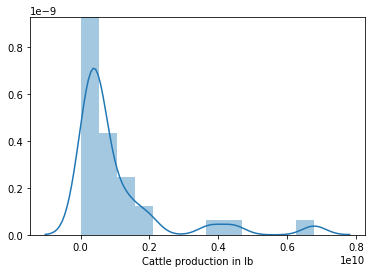

In [903]:
sns.distplot(x['Cattle production in lb'])

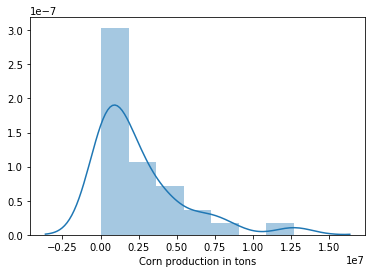

In [904]:
sns.distplot(x['Corn production in tons'])

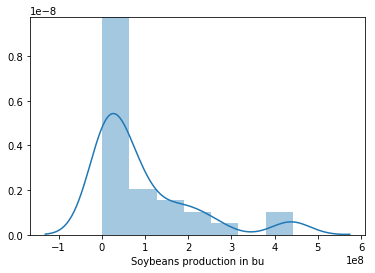

In [905]:
sns.distplot(x['Soybeans production in bu'])

In [72]:
corn_acres_raw = pd.read_csv('corn planted by acres by state from 1866-2018.csv')

In [73]:
corn_acres_raw = corn_acres_raw[corn_acres_raw['Program']=="SURVEY"]

In [74]:
corn_acres_raw = corn_acres_raw.drop(['Program','Period','Week Ending','Geo Level', 'Ag District','State ANSI',
                          'Ag District Code','County','County ANSI','Zip Code','Region',
                              'watershed_code','Watershed','Domain Category','Commodity','Domain','CV (%)'],axis = 1)

In [75]:
corn_acres_clean = corn_acres_raw.rename(columns={'Value':"CORN - ACRES PLANTED"})

In [76]:
corn_acres = corn_acres_clean.drop(['Data Item'], axis = 1)

In [77]:
#corn_acres.head()

In [78]:
corn_acres_sort = corn_acres.sort_values(by = ['State','Year'])

In [79]:
corn_acres_fil = corn_acres_sort[(corn_acres_sort['Year']>=1988) & (corn_acres_sort['Year'] < 2018)]


In [80]:
corn_acres_dropdup = corn_acres_fil.drop_duplicates(subset=['Year','State'], keep='first')

In [81]:
corn_acres_final = corn_acres_dropdup

In [82]:
df_ccs_ca = pd.merge(df_ccs,corn_acres_final, how = 'left')

In [83]:
#df_ccs_ca

In [104]:
soyb_acres_raw = pd.read_csv('soybean planted by acres by state from 1924-2018.csv')

In [105]:
soyb_acres_raw = soyb_acres_raw[soyb_acres_raw['Program']=="SURVEY"]

In [106]:
soyb_acres_raw = soyb_acres_raw.drop(['Program','Period','Week Ending','Geo Level', 'Ag District','State ANSI',
                          'Ag District Code','County','County ANSI','Zip Code','Region',
                              'watershed_code','Watershed','Domain Category','Commodity','Domain','CV (%)'],axis = 1)

In [107]:
soyb_acres_clean = soyb_acres_raw.rename(columns={'Value':"SOYBEANS - ACRES PLANTED"})

In [108]:
soyb_acres = soyb_acres_clean.drop(['Data Item'], axis = 1)

In [109]:
soyb_acres_sort = soyb_acres.sort_values(by = ['State','Year'])

In [110]:
soyb_acres_fil = soyb_acres_sort[(soyb_acres_sort['Year']>=1988) & (soyb_acres_sort['Year'] < 2018)]


In [111]:
soyb_acres_dropdup = soyb_acres_fil.drop_duplicates(subset=['Year','State'], keep='first')

In [112]:
soyb_acres_final = soyb_acres_dropdup

In [113]:
#soyb_acres_final

In [114]:
df_ccs_ca_sa = pd.merge(df_ccs_ca,soyb_acres_final, how = 'left')

In [115]:
df_ccs_ca_sa

,Year,State,Cattle production in lb,Corn production in tons,Soybeans production in bu,CORN - ACRES PLANTED,SOYBEANS - ACRES PLANTED
0,1988,alabama,"671,520,000","160,000",14250000.0,NaN,NaN
1,1989,alabama,"680,350,000","250,000",11970000.0,NaN,NaN
2,1990,alabama,"641,115,000","200,000",7480000.0,NaN,NaN
3,1991,alabama,"659,250,000","350,000",8050000.0,NaN,NaN
4,1992,alabama,"525,310,000","325,000",7830000.0,NaN,NaN
5,1993,alabama,"508,476,000","225,000",7080000.0,NaN,NaN
6,1994,alabama,"504,349,000","300,000",9145000.0,NaN,NaN
7,1995,alabama,"544,968,000","160,000",5400000.0,NaN,NaN
8,1996,alabama,"535,183,000","165,000",10370000.0,NaN,NaN
9,1997,alabama,"556,289,000","280,000",8500000.0,NaN,NaN


In [ ]:
## soybean and corn by acres data are missing for most of the States.